In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(r'D:\사용자\USER\Desktop\데이터\유사도\유사도3.csv', encoding='cp949')
df = df.drop(columns=['구군'], axis=1)
df
feature=df


In [5]:
model = KMeans(n_clusters=8,init = 'k-means++', n_init = 10, max_iter = 300,random_state=5) #,algorithm='auto' 
#random_state 5가 최대 0.4059880543975222
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']


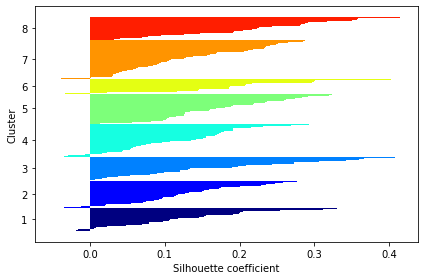

In [6]:
from sklearn.metrics import silhouette_samples
# sklearn의 metrics 모델 안에 silhouette_samples함수로 계산
# k-means++ 알고리즘 
#km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0) 

km=model
X=feature
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] 
# 실루엣 분석
silhouette_vals = silhouette_samples(X, y_km, metric = 'manhattan') 
# 시각화 
y_ax_lower, y_ax_upper = 0, 0
yticks = [] 
for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout() 
plt.show()

In [7]:
silhouette_avg

0.1523067157651785